below is neccessary imports


In [3]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
#import chess

below is code for main

In [4]:
def dataLoader(x):
    data = pd.read_csv(x)
    return data


below is main

In [5]:
f = "games.csv"
data = dataLoader("games.csv")
header = data.head
df = pd.DataFrame(data)

slctCol =  df[['victory_status', 'winner', 'white_rating', 'black_rating', 'moves', 'opening_eco','opening_name', 'opening_ply']]
slctCol = slctCol[(slctCol['victory_status'] == 'mate') | (slctCol['victory_status'] == 'resign')]


npData = data.to_numpy() #Convert to numpy NDArray



'''
trainingData = npData[0:(int)(npData.shape[0] * 0.8)]
testingData = npData[len(trainingData): len(npData)] # Don't touch this until we're testing our performance
'''

#print("Training Shape: ", trainingData.shape)
#print("Testing Shape: ", testingData.shape)

'''
These are some notes about Standard Chess Notation for referencing moves. The board is 8x8, with the bottom left corner
being A1 and the top right being H8. The top left corner would be A8 and the bottom right corner would be H1. Using the
Python chess library to interpret moves to prevent manual checking and parsing: https://pypi.org/project/python-chess/
'''

#print(data.iloc[3]) # show third rowrow

firstOneDict = {}
firstTwoDict = {}
firstThreeDict = {}
firstXDict = {}

for sampleIndex in range(len(npData)):
    moves = npData[sampleIndex][12] # 12 is the index for the moves
    movesList = moves.split()

    firstOne = " ".join(movesList[0:2]) # Moves 0 for each player in space-separated string
    firstTwo = " ".join(movesList[0:4]) # Moves 0, 1 for each player in space-separated string
    firstThree = " ".join(movesList[0:6]) # Moves 0, 1, 2 for each player in space-separated string
    firstX = " ".join(movesList[0:4]) # X Movesfor each player in space-separated string

    if firstOne in firstOneDict.keys():
        firstOneDict[firstOne].append(sampleIndex)
    else:
        firstOneDict[firstOne] = [sampleIndex]
    
    if firstTwo in firstTwoDict.keys():
        firstTwoDict[firstTwo].append(sampleIndex)
    else:
        firstTwoDict[firstTwo] = [sampleIndex]

    if firstThree in firstThreeDict.keys():
        firstThreeDict[firstThree].append(sampleIndex)
    else:
        firstThreeDict[firstX] = [sampleIndex]
        
    if firstX in firstXDict.keys():
        firstXDict[firstX].append(sampleIndex)
    else:
        firstXDict[firstX] = [sampleIndex]


#print("One keys: ", len(firstOneDict.keys()))
#print("Two keys: ", len(firstTwoDict.keys()))
#print("Three keys: ", len(firstThreeDict.keys()))

print("---- START OF ONE DICT ----")

yCforCompareOne = np.empty(0)
yPforCompareOne = np.empty(0)

for key in firstOneDict.keys():
    
    if len(firstOneDict[key]) >= 2:

        trainingIndices = firstOneDict[key][0:(int)(len(firstOneDict[key]) * 0.8)]
        testingIndices = firstOneDict[key][len(trainingIndices):len(firstOneDict[key])]

        #trainingData = npData[0:(int)(npData.shape[0] * 0.8)]
        #testingData = npData[len(trainingData): len(npData)] # Don't touch this until we're testing our performance

        #print("Key: ", key)
        indices = firstOneDict[key]

        xTraining = np.empty((len(trainingIndices), 2)) # 2 for p1Rating and p2Rating
        yTraining = np.empty(len(trainingIndices), dtype=object) # Winner

        count = 0
        for index in trainingIndices:
            curr = npData[index]

            p1Rating = curr[9]
            p2Rating = curr[11]
            winner = curr[6]

            xTraining[count][0] = p1Rating
            xTraining[count][1] = p2Rating
            yTraining[count] = winner

            count += 1

        classifier = DecisionTreeClassifier()
        classifier.fit(xTraining, yTraining)

        ##### TESTING #####

        xTesting = np.empty((len(testingIndices), 2)) # 2 for p1Rating and p2Rating
        yTestingCorrect = np.empty(len(testingIndices), dtype=object) # Winner

        count = 0

        for index in testingIndices:
            curr = npData[index]

            #print("Curr: ", curr)

            p1Rating = curr[9]
            p2Rating = curr[11]
            winner = curr[6]

            xTesting[count][0] = p1Rating
            xTesting[count][1] = p2Rating
            yTestingCorrect[count] = winner

            count += 1

        yTestingPredictions = classifier.predict(xTesting)
        
        yCforCompareOne = np.append(yCforCompareOne,yTestingCorrect)
        yPforCompareOne = np.append(yPforCompareOne,yTestingPredictions)
        
        
        #print(confusion_matrix(yTestingCorrect, yTestingPredictions))
        #print(classification_report(yTestingCorrect, yTestingPredictions))


print("end of one")
print("Accuracy:",metrics.accuracy_score(yCforCompareOne, yPforCompareOne))

print("---- START OF TWO DICT ----")

yCforCompareTwo = np.empty(0)
yPforCompareTwo = np.empty(0)

for key in firstTwoDict.keys():
    
    #print("Key Length: ", len(firstTwoDict[key]))
    
    if len(firstTwoDict[key]) >= 2:

        trainingIndices = firstTwoDict[key][0:(int)(len(firstTwoDict[key]) * 0.8)]
        testingIndices = firstTwoDict[key][len(trainingIndices):len(firstTwoDict[key])]

        #trainingData = npData[0:(int)(npData.shape[0] * 0.8)]
        #testingData = npData[len(trainingData): len(npData)] # Don't touch this until we're testing our performance


        #print("Key: ", key)
        indices = firstTwoDict[key]

        xTraining = np.empty((len(trainingIndices), 2)) # 2 for p1Rating and p2Rating
        yTraining = np.empty(len(trainingIndices), dtype=object) # Winner

        count = 0
        for index in trainingIndices:
            curr = npData[index]

            p1Rating = curr[9]
            p2Rating = curr[11]
            winner = curr[6]

            xTraining[count][0] = p1Rating
            xTraining[count][1] = p2Rating
            yTraining[count] = winner

            count += 1

        classifier = DecisionTreeClassifier()
        classifier.fit(xTraining, yTraining)

        ##### TESTING #####

        xTesting = np.empty((len(testingIndices), 2)) # 2 for p1Rating and p2Rating
        yTestingCorrect = np.empty(len(testingIndices), dtype=object) # Winner

        count = 0

        for index in testingIndices:
            curr = npData[index]

            #print("Curr: ", curr)

            p1Rating = curr[9]
            p2Rating = curr[11]
            winner = curr[6]

            xTesting[count][0] = p1Rating
            xTesting[count][1] = p2Rating
            yTestingCorrect[count] = winner

            count += 1

        yTestingPredictions = classifier.predict(xTesting)
        
        yCforCompareTwo = np.append(yCforCompareTwo,yTestingCorrect)
        yPforCompareTwo = np.append(yPforCompareTwo,yTestingPredictions)

        #print(confusion_matrix(yTestingCorrect, yTestingPredictions))
        #print(classification_report(yTestingCorrect, yTestingPredictions))
    else:
        None
        #print(' ')
        #print("Skipping key due to insufficient data.")



print("end of two")

print("Accuracy:",metrics.accuracy_score(yCforCompareTwo, yPforCompareTwo))




print("---- START OF THREE DICT ----")

yCforCompareThree = np.empty(0)
yPforCompareThree = np.empty(0)
numkey = 0
for key in firstThreeDict.keys():
    
    #print("Key Length: ", len(firstThreeDict[key]))
    
    if len(firstThreeDict[key]) >= 2:
        numkey = numkey + 1

        trainingIndices = firstThreeDict[key][0:(int)(len(firstThreeDict[key]) * 0.8)]
        testingIndices = firstThreeDict[key][len(trainingIndices):len(firstThreeDict[key])]

        #trainingData = npData[0:(int)(npData.shape[0] * 0.8)]
        #testingData = npData[len(trainingData): len(npData)] # Don't touch this until we're testing our performance


        #print("Key: ", key)
        indices = firstThreeDict[key]

        xTraining = np.empty((len(trainingIndices), 2)) # 2 for p1Rating and p2Rating
        yTraining = np.empty(len(trainingIndices), dtype=object) # Winner

        count = 0
        for index in trainingIndices:
            curr = npData[index]

            p1Rating = curr[9]
            p2Rating = curr[11]
            winner = curr[6]

            xTraining[count][0] = p1Rating
            xTraining[count][1] = p2Rating
            yTraining[count] = winner

            count += 1

        classifier = DecisionTreeClassifier()
        classifier.fit(xTraining, yTraining)

        ##### TESTING #####

        xTesting = np.empty((len(testingIndices), 2)) # 2 for p1Rating and p2Rating
        yTestingCorrect = np.empty(len(testingIndices), dtype=object) # Winner

        count = 0

        for index in testingIndices:
            curr = npData[index]

            #print("Curr: ", curr)

            p1Rating = curr[9]
            p2Rating = curr[11]
            winner = curr[6]

            xTesting[count][0] = p1Rating
            xTesting[count][1] = p2Rating
            yTestingCorrect[count] = winner

            count += 1

        yTestingPredictions = classifier.predict(xTesting)
        
        yCforCompareThree = np.append(yCforCompareThree,yTestingCorrect)
        yPforCompareThree = np.append(yPforCompareThree,yTestingPredictions)

        #print(confusion_matrix(yTestingCorrect, yTestingPredictions))
        #print(classification_report(yTestingCorrect, yTestingPredictions))
    else:
        None
        #print("Skipping key due to insufficient data.")

print("end of three")
#print("numkey",numkey)

print("Accuracy:",metrics.accuracy_score(yCforCompareThree, yPforCompareThree))



---- START OF ONE DICT ----
end of one
Accuracy: 0.5550639134709932
---- START OF TWO DICT ----
end of two
Accuracy: 0.5458845789971618
---- START OF THREE DICT ----
end of three
Accuracy: 0.8115942028985508


if key legth is greter than 250,
you can see which is top 10 popular opening for first 2 moves of each player.(so firstTwo, meaning 0:4)
if you look at firstSeven, you can see the accuracy goes up to 90percent.

In [27]:
def keyAndOpening(keyLength, numMoves, mode):
    firstXDict = {}
    for sampleIndex in range(len(npData)):
        moves = npData[sampleIndex][12] # 12 is the index for the moves
        movesList = moves.split()
        firstX = " ".join(movesList[0:numMoves*2]) # X Movesfor each player in space-separated string
        if firstX in firstXDict.keys():
            firstXDict[firstX].append(sampleIndex)
        else:
            firstXDict[firstX] = [sampleIndex]
    yCforCompareX = np.empty(0)
    yPforCompareX = np.empty(0)
    numkey = 0
    for key in firstXDict.keys():
        if len(firstXDict[key]) >= keyLength:
                numkey = numkey + 1
                trainingIndices = firstXDict[key][0:(int)(len(firstXDict[key]) * 0.8)]
                testingIndices = firstXDict[key][len(trainingIndices):len(firstXDict[key])]
                indices = firstXDict[key]
                xTraining = np.empty((len(trainingIndices), 2)) # 2 for p1Rating and p2Rating
                yTraining = np.empty(len(trainingIndices), dtype=object) # Winner
                count = 0
                for index in trainingIndices:
                    curr = npData[index]
                    p1Rating = curr[9]
                    p2Rating = curr[11]
                    winner = curr[6]
                    xTraining[count][0] = p1Rating
                    xTraining[count][1] = p2Rating
                    yTraining[count] = winner
                    count += 1
                classifier = DecisionTreeClassifier()
                classifier.fit(xTraining, yTraining)
                
                ##### TESTING #####
                
                xTesting = np.empty((len(testingIndices), 2)) # 2 for p1Rating and p2Rating
                yTestingCorrect = np.empty(len(testingIndices), dtype=object) # Winner
                count = 0
                for index in testingIndices:
                    curr = npData[index]
                    #print("Curr: ", curr)
                    p1Rating = curr[9]
                    p2Rating = curr[11]
                    winner = curr[6]
                    xTesting[count][0] = p1Rating
                    xTesting[count][1] = p2Rating
                    yTestingCorrect[count] = winner
                    count += 1
                yTestingPredictions = classifier.predict(xTesting)
                yCforCompareX = np.append(yCforCompareX,yTestingCorrect)
                yPforCompareX = np.append(yPforCompareX,yTestingPredictions)
         
        else:
            None
    score = 0
    if mode == 0 or mode == None:
        #print("accuracy")
        score = metrics.accuracy_score(yCforCompareX, yPforCompareX)
    elif mode == 1:
        #print("precision, micro")
        score = metrics.precision_score(yCforCompareX, yPforCompareX, average = "micro")
    else:
        #print("recall micro")
        score = metrics.recall_score(yCforCompareX, yPforCompareX, average = "micro")
    return (numkey,score)


In [28]:
ans = keyAndOpening(1000, 2,0) # param 1 = keyLength is number of instance per move    param 2 = number moes in opening
print("numkey", ans[0])
print("Accuracy", ans[1])

numkey 1
Accuracy 0.5471014492753623


In [3]:
graphX = np.empty(0)
graphY = np.empty(0)
for i in range(1,11):
    graphX = np.append(graphX,i)
    tup = keyAndOpening(2,i,0)
    numkey = tup[0]
    Acc = tup[1]
    graphY = np.append(graphY,Acc)
plt.plot(graphX, graphY)
plt.show
print("Accuracy graph as opening length increase")

NameError: name 'np' is not defined

In [2]:
graphX = np.empty(0)
graphY = np.empty(0)
for i in range(1,11):
    graphX = np.append(graphX,i)
    tup = keyAndOpening(2,i,1)
    numkey = tup[0]
    Acc = tup[1]
    graphY = np.append(graphY,Acc)
plt.plot(graphX, graphY)
plt.show
print("precision graph as opening length increase")

NameError: name 'np' is not defined

recall graph as opening length increase


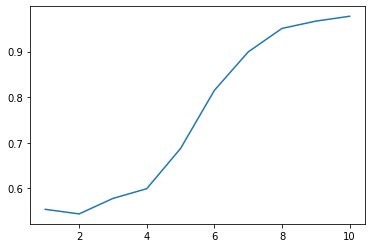

In [31]:
graphX = np.empty(0)
graphY = np.empty(0)
for i in range(1,11):
    graphX = np.append(graphX,i)
    tup = keyAndOpening(2,i,2)
    numkey = tup[0]
    Acc = tup[1]
    graphY = np.append(graphY,Acc)
plt.plot(graphX, graphY)
plt.show
print("recall graph as opening length increase")